In [141]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [142]:
def generate_data(n):
    half = int(n/2)
    total = np.zeros((3,n)) # 2 features + bias
    cov   = 2*np.identity(2)
    
#     print("half %d" % half)

    total[0,:] = 1
    total[1:, :half] = np.random.multivariate_normal( [0,1], cov, half ).T
    total[1:, half:] = np.random.multivariate_normal( [1,0], cov, n-half ).T

    y = np.array([1]*half + [-1]*(n-half))

    return total, y 

small_x, small_y = generate_data(10)
print(small_x)
print(small_y)


[[ 1.          1.          1.          1.          1.          1.          1.
   1.          1.          1.        ]
 [ 2.23850376  0.02923729 -1.40071629 -0.28652376  0.62797201  0.73136522
  -0.36192771 -0.64183336  0.71588556  1.44567475]
 [ 2.78097371  1.97655147  3.85563185 -0.73070276 -0.74638712 -1.30198095
  -0.96154854  1.88395501  1.72679897 -0.46955984]]
[ 1  1  1  1  1 -1 -1 -1 -1 -1]


In [143]:
def learn(x,y):
    inv_x = np.linalg.inv(np.dot(x,x.T) + 0.001*np.identity(x.shape[0]))
    xy = np.dot(x,y)
    w  = np.dot(inv_x,xy)
    return w

small_w = learn(small_x, small_y)

In [151]:
def pred(w, x):
    dp = np.dot(w,x)
    
    y_hat = np.vectorize(lambda d: 1 if d >= 0 else -1 )(dp)
    
    return y_hat

pred_small = pred(small_w, small_x)
accuracy_score( pred_small, small_y )

0.59999999999999998

In [145]:
test_x, test_y = generate_data(1000)

In [166]:
def learn_pred(n, test_x, test_y):
    x, y = generate_data(n)
#     print(x)
    w = learn(x,y)
    
    r_train = accuracy_score( pred(w, x), y )
    r_test  = accuracy_score( pred(w, test_x), test_y )
    
    return (r_train,r_test, w[1], w[2], w[0])

learn_pred(10, test_x, test_y)

(0.69999999999999996,
 0.67100000000000004,
 -0.14241944959619798,
 0.38124488485227109,
 -0.32676662787468613)

In [170]:
N = [2]
N = [2,4,6,8,10,20,40,100]

def try_with_n( arr_n, test_x, test_y, rep=50):
    size_n = len(arr_n)
    
    st = 5
    
    mean_basket = np.zeros((st,size_n))
    std_basket = np.zeros((st,size_n))

    
    for k in range(size_n):
        n = arr_n[k]
        local_stats = np.zeros((st,rep))

        r_n_train = [0]*rep
        r_n_test  = [0]*rep
        
        for i in range(rep):
            accs = learn_pred(n, test_x, test_y)
            
            for j in range(len(accs)):
                local_stats[j,i] = accs[j]
        
        avg = np.mean(local_stats,axis=1)
        std = np.std(local_stats,axis=1)
        
        mean_basket[:, k] = avg
        std_basket[:, k ] = std
    return (mean_basket, std_basket)

            
(mean_res, std_res) = try_with_n( N, test_x,test_y) # row = 0:r_train, 1:r_test, 2:w1, 3:w2, 4:b

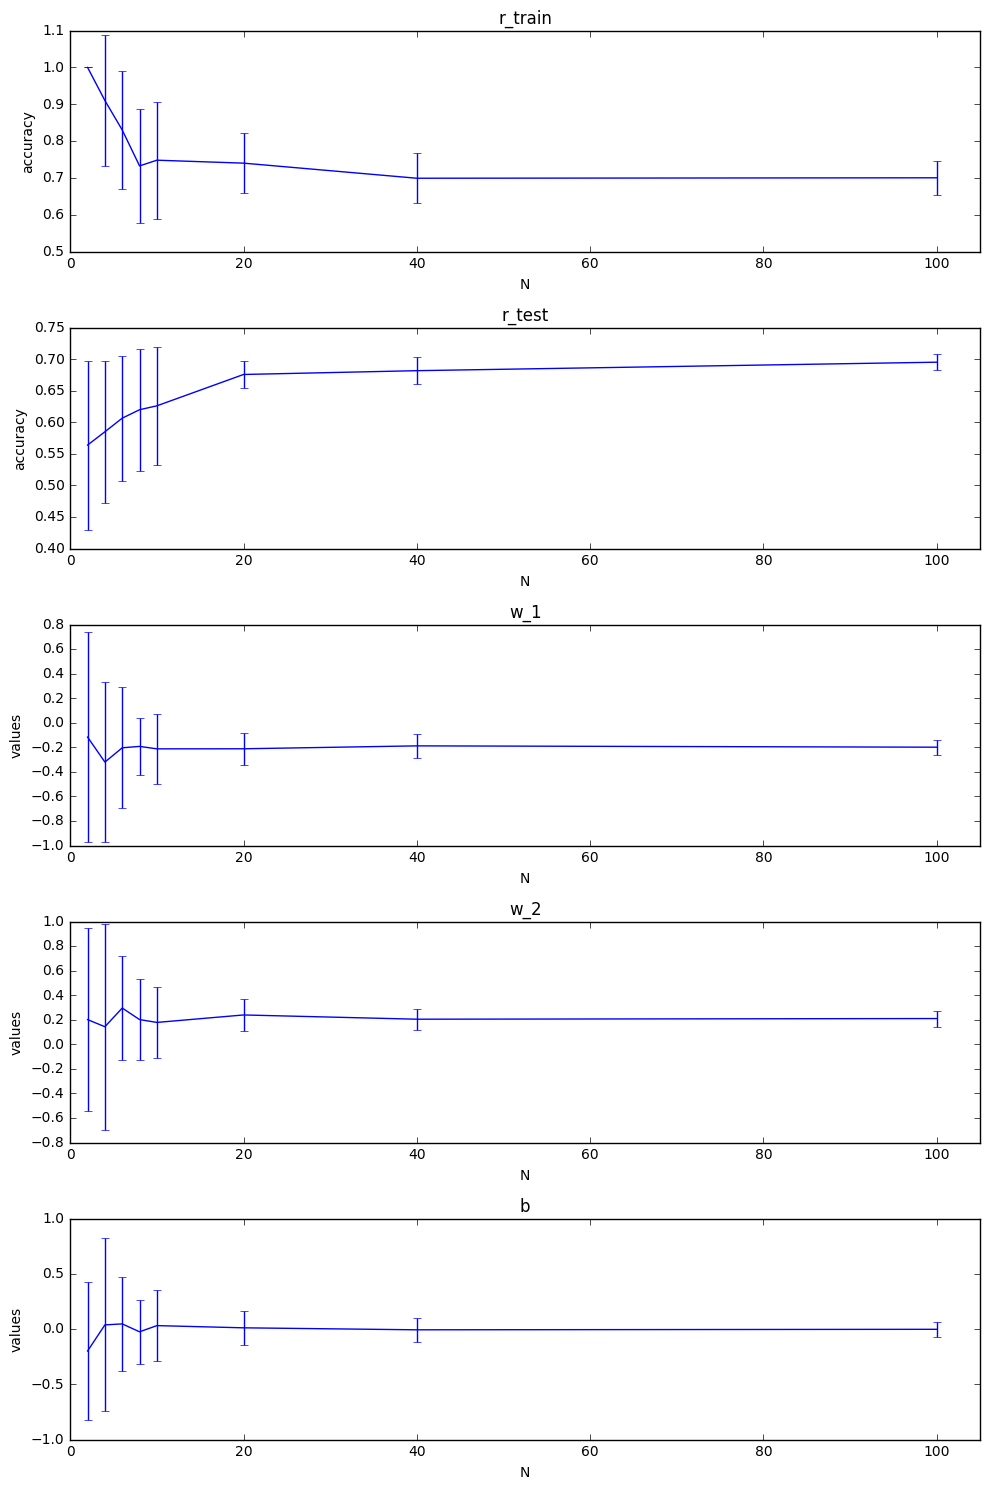

In [174]:
plt.rcParams["figure.figsize"] = [10,15]

def plotAccuracy( arr_n, mean, std):

    desc = ["r_train", "r_test", "w_1", "w_2", "b"] 
    for i in range(len(desc)):
        plt.subplot(5,1,i+1)
        if i < 2:
            plt.ylabel("accuracy")

        else:
            plt.ylabel("values")
            
        plt.title(desc[i])
        plt.xlabel("N")

        plt.xlim(0, np.max(arr_n)+5)
        plt.errorbar(arr_n, mean[i,:] , yerr=std[i,:])
    

    plt.tight_layout()
    plt.plot()

plotAccuracy( N, mean_res, std_res)


### c) Interpretation result
In general, STD gets small as increase of N. For accuracty, r_train and r_test show opposite trend: r_train decrease as N increases, while r_test increase



# 7.3)
## a)
![img](http://i.imgur.com/x3wjwA4.png)
![img](http://i.imgur.com/0mt4Tg2.png)
![img](http://i.imgur.com/TctxTK9.png)
if it could be used to model random experiment than each trial is indenpedent from others( p remains the same for each trial).

property : symmetry around (p*no.trials)

## b)
yes, 
